<a href="https://colab.research.google.com/github/catianascimento/RCP209-ApprentissageStatistique2/blob/main/RCP209_Projet_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

The dataset is available on the page: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Counting missing data

In [6]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      diabetes.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Count number of Zeros in all Columns

In [7]:
# Count number of zeros in all columns of Dataframe
for column_name in diabetes.columns:
    column = diabetes[column_name]
    # Get the count of Zeros in column
    percent = (column == 0).sum()/len(diabetes) *100
    count = (column == 0).sum()
    print('Column ', column_name, ' has ', count, 'zeros (', percent,'%)')
    # print('Count of zeros in column ', column_name, ' is : ', count)

Column  Pregnancies  has  111 zeros ( 14.453125 %)
Column  Glucose  has  5 zeros ( 0.6510416666666667 %)
Column  BloodPressure  has  35 zeros ( 4.557291666666666 %)
Column  SkinThickness  has  227 zeros ( 29.557291666666668 %)
Column  Insulin  has  374 zeros ( 48.69791666666667 %)
Column  BMI  has  11 zeros ( 1.4322916666666665 %)
Column  DiabetesPedigreeFunction  has  0 zeros ( 0.0 %)
Column  Age  has  0 zeros ( 0.0 %)
Column  Outcome  has  500 zeros ( 65.10416666666666 %)


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Counting repeated rows in dataframe

In [9]:
db = diabetes.groupby(diabetes.columns.tolist(),as_index=False).size()
db[db['size']>1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,size


In [10]:
print(diabetes[diabetes.duplicated()])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


##Variables

In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pearson Correlation

In [12]:
x = diabetes.drop('Outcome', axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y = diabetes['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#Exploratory Data Analysis (EDA)

Age

In [15]:
type(diabetes['Age'])

pandas.core.series.Series

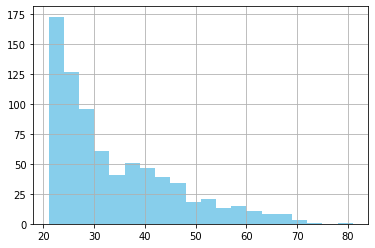

In [16]:
diabetes['Age'].hist(bins=20, color = "skyblue")
# plt.plot(round(diabetes['Age'].mean()), round(diabetes['Age'].mean()), color='g', label='cos')

Blood Pressure


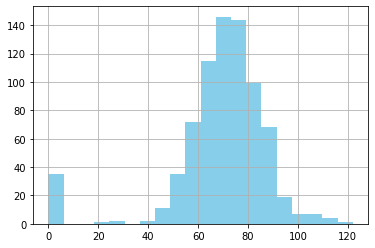

In [17]:
diabetes['BloodPressure'].hist(bins=20, color = "skyblue")

Skin Thickness

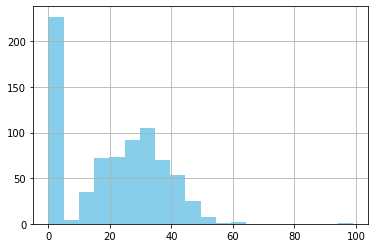

In [18]:
diabetes['SkinThickness'].hist(bins=20, color = "skyblue")

Insulin

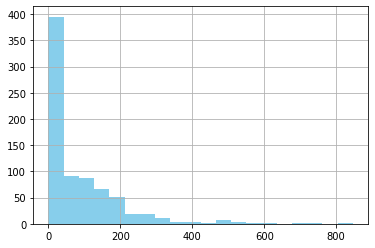

In [19]:
diabetes['Insulin'].hist(bins=20, color = "skyblue")

BMI

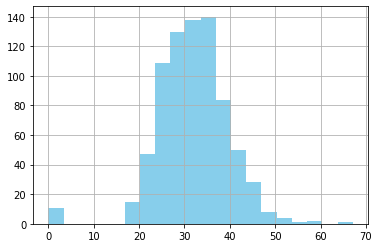

In [20]:
diabetes['BMI'].hist(bins=20, color = "skyblue")

DiabetesPedigreeFunction

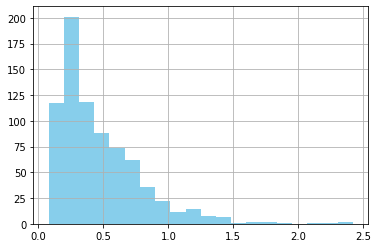

In [21]:
diabetes['DiabetesPedigreeFunction'].hist(bins=20, color = "skyblue")

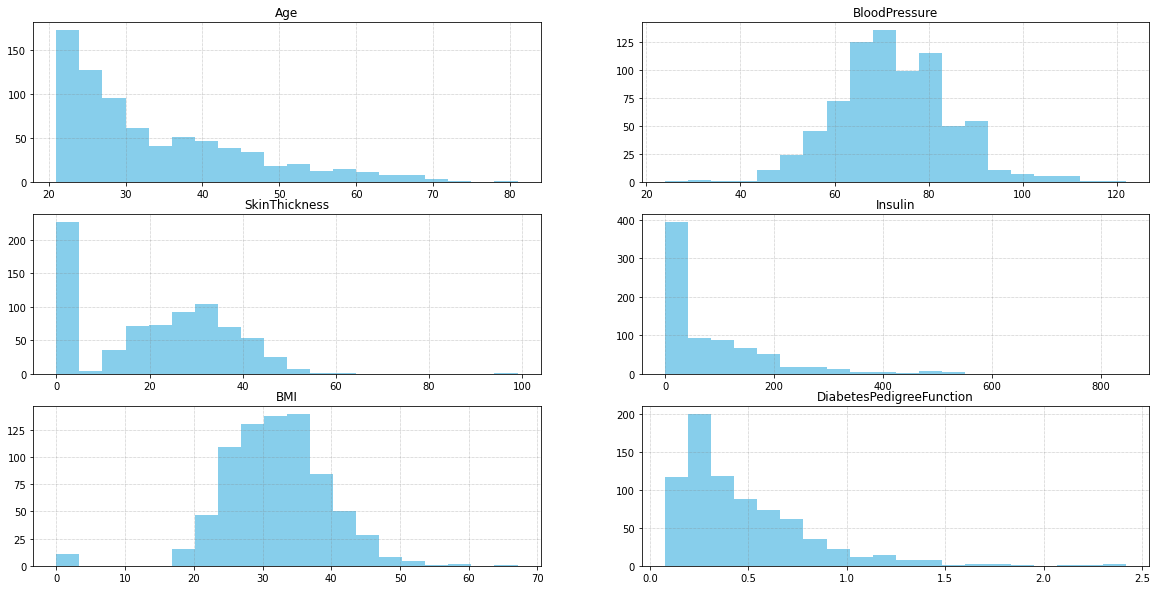

In [36]:
data = [diabetes['Age'], diabetes['BloodPressure'],diabetes['SkinThickness'], diabetes['Insulin'], diabetes['BMI'], diabetes['DiabetesPedigreeFunction']]
titles =['Age', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

f, a = plt.subplots(3,2)
a = a.ravel()

# fig = plt.figure(figsize=(12, 8))
for idx, ax in enumerate(a):
    ax.hist(data[idx], bins=20, color = "skyblue")
    ax.set_title(titles[idx],
             fontsize = 12)
    ax.grid(color='grey', linestyle=':', linewidth=0.5)

plt.show()
plt.rcParams["figure.figsize"] = (20,15)

In [28]:
from scipy.stats import shapiro
stat, p = shapiro(diabetes['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics,p = 0.819, 0.000

Statistics=0.819, p=0.000


Blood Pressure - Replacing 0 values by the median

Text(0.5, 1.0, 'Blood Pressure')

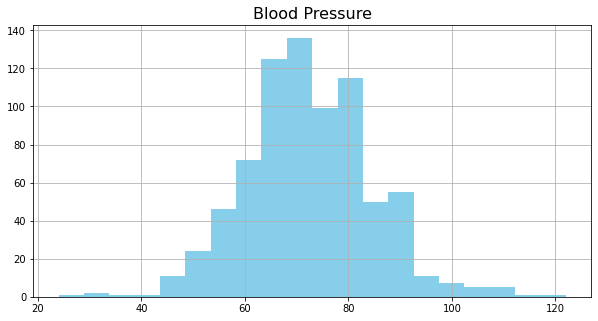

In [46]:
diabetes.loc[diabetes["BloodPressure"] == 0, "BloodPressure"] = diabetes["BloodPressure"].median()
diabetes['BloodPressure'].hist(bins=20, color = "skyblue")
# ax.set_title('Blood Pressure', fontsize = 12)
plt.rcParams["figure.figsize"] = (10,5)
plt.title("Blood Pressure", fontsize = 16)

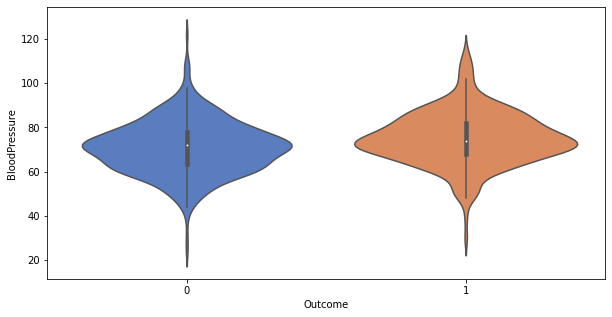

In [48]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=diabetes, palette='muted', split=True)

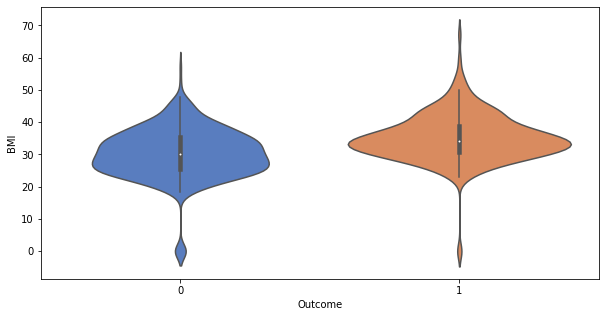

In [49]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BMI', data=diabetes, palette='muted', split=True)

BMI - Replacing 0 values by the median

Text(0.5, 1.0, 'BMI')

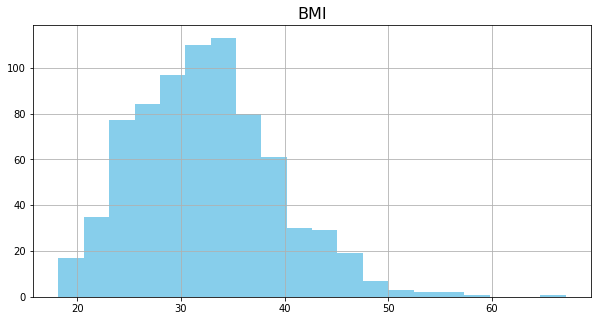

In [50]:
diabetes.loc[diabetes["BMI"] == 0, "BMI"] = diabetes["BMI"].median()
diabetes['BMI'].hist(bins=20, color = "skyblue")
# ax.set_title('Blood Pressure', fontsize = 12)
plt.rcParams["figure.figsize"] = (10,5)
plt.title("BMI", fontsize = 16)

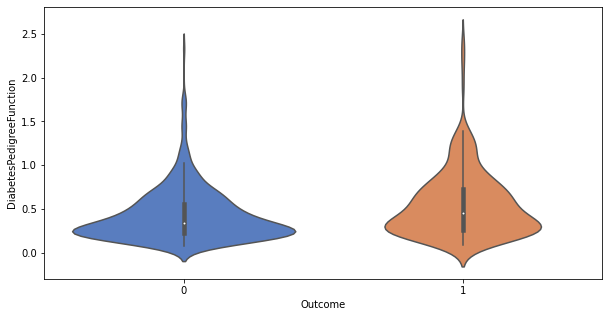

In [51]:
#Classifying the DiabetesPedigreeFunction based on class
ax = sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes, palette='muted', split=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 4121988

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_tree = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [ ]:
clf_tree.fit(x_train, y_train)

In [ ]:
clf_tree.score(x_test, y_test)

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(x_train, y_train)

In [ ]:
clf_dummy.score(x_test, y_test)

#Plotting tree

In [ ]:
from sklearn import tree

import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,10))
tree.plot_tree(clf_tree,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled= True,
               feature_names=x_train.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

#GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(x_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(x_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

#Forêts aléatoires

On peut désormais créer et entraîner notre modèle :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test,y_test)
print(accuracy)

Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas) ?

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
Z = clf.predict(x_test)
print("Arbre de décision : " + str(clf.score(x_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(x_train, y_train)
Z = clf.predict(x_test)
print("Bagging (200 arbres) : " + str(clf.score(x_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(x_train, y_train)
Z = clf.predict(x_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(x_test,y_test)))

Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur on n’améliore plus

In [ ]:
N = 30
accuracy = []

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(x_train, y_train)
    accuracy.append(clf.score(x_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

Les Extra-Trees (Extremely Randomized Trees) randomisent encore plus la construction de l’arbre et sont utilisés surtout pour des données numériques. Par rapport aux forêts aléatoires, ils abandonnent l’utilisation des échantillons de bootstrap et pour chaque feature candidat choisissent un seuil de coupure aléatoire. L’idée fonctionne plutôt bien pour de problèmes d’apprentissage qui ont un grand nombre de features qui varient de manière continue. Souvent leur taux d’erreur est supérieur aux forêts aléatoires, le temps de calcul plus faible et les arbres générés sont plus grands.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np

clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train, y_train)
accuracy=clf.score(x_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test,y_test)
print("Extra Trees : " + str(accuracy))

#Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

Le paramètre max_depth contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir l’impact de l’utilisation d’un classifieur faible vs plus fort (max_depth élevé ou éliminer le paramètre). Testez aussi l’effet du paramètre learning_rate et le nombre de classifieurs.

RESPONSE:

max_depth féible génère des arbres peu profonds qui ont tendance à généraliser mal. max_dept élevé génère des arbres trop profonds (sur-apprentissage) d’où encore une mauvaise généralisation :

(max_dept, accuracy) : (2, 0.70), (3, 0.85), (4, 0.87), (5, 0.89), (10, 0.95), (15, 0.80)

Par contre, un mauvais classifieur faible (par exemple max_depth = 2) peut etre compensé par un parametre n_estimators plus grand : n_estimators = 30 donne accuracy = 0.85, n_estimators = 300 donne accuracy = 0.95.

Une valeur plus faible de learning_rate permet d’améliorer le score, mais pas au-delà d’une certaine valeur : learning_rate = 2 donne accuracy = 0.89, learning_rate = 0.1 donne accuracy = 0.93 mais learning_rate = 0.1 ne change plus le taux d’erreurs.